# Comparison of LinearSVC with Dummy Classifier

## Importing Packages

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

## Read CSV

In [34]:
df = pd.read_csv('eclipse_jdt.csv')

## Exploratory Data Analysis

This section helps in data visualization.

In [35]:
pd.set_option('display.max_colwidth', 3)
print("Sample of data:\n", df.sample(1).T)

Sample of data:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               42637
Issue_id          347565                                                                                                                                           

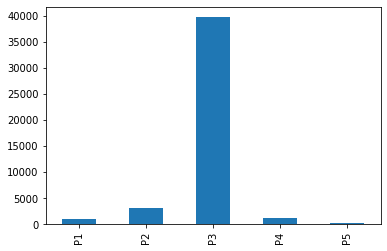

In [36]:
df['Priority'].value_counts().sort_index().plot(kind='bar')
plt.show()

## Data Preprocessing

### Data Transformation

In [37]:
df['text'] = df['Title'] + ' ' + df['Description']
df = df.drop(columns=['Title','Description'])

### Data Filtering

In [38]:
df = df[df['text'].str.len() > 50]

## Train-Test Split

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],
                                                    df['Priority'],
                                                    test_size=0.2,
                                                    stratify=df['Priority'])

print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

Size of Training Data  36070
Size of Test Data  9018


## TF-IDF Vectorizer

In [40]:
tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

## Applying Classifiers

In [41]:
def apply_model(model, X, Y, X_test, Y_test):
  model.fit(X, Y)
  Y_pred = model.predict(X_test)
  print ('Accuracy Score - ', accuracy_score(Y_test, Y_pred))

### Linear SVC

#### Applying Model

In [42]:
model = LinearSVC(random_state=0, tol=1e-5)
apply_model(model, X_train_tf, Y_train, X_test_tf, Y_test)

Accuracy Score -  0.8731426036815259


#### Plotting Confusion Matrix

In [43]:
Y_pred = model.predict(X_test_tf)
print(confusion_matrix(Y_test, Y_pred))

[[  22   17  184    1    0]
 [   4   16  585    3    0]
 [  21   59 7805   23    0]
 [   0    3  194   31    0]
 [   1    0   49    0    0]]


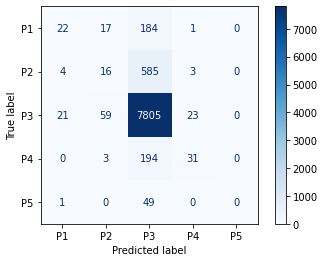

In [44]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred, values_format='d', cmap=plt.cm.Blues)
plt.show()

### Dummy Classifier

#### Applying Model

In [45]:
model = DummyClassifier(strategy='most_frequent')
apply_model(model, X_train, Y_train, X_test, Y_test)

Accuracy Score -  0.8769128409846972


#### Plotting Confusion Matrix

In [46]:
Y_pred = model.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))

[[   0    0  224    0    0]
 [   0    0  608    0    0]
 [   0    0 7908    0    0]
 [   0    0  228    0    0]
 [   0    0   50    0    0]]


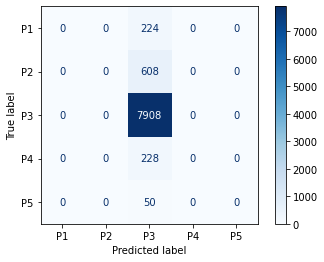

In [47]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred, values_format='d', cmap=plt.cm.Blues)
plt.show()

## Conclusion

Linear SVC and DummyClassifier almost give the same accuracy.